# 7. KMeans Clustering with Scikit-Learn and MLlib

Implement the K-Means Algorithm using Scikit-Learn and MLlib!

In [97]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

The dataset class provides access to different public datasets. It will return a scikit-learn bunch: <http://scikit-learn.org/stable/datasets/index.html>

In [16]:
iris = datasets.load_iris()

Convert Scikit Bunch to Pandas Dataframe

In [17]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df["target_name"]=iris['target_names'][iris_df['target']] 
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 7.1 Cluster the data using the KMeans implementation of scikit-learn!

* Resource: <http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html>
* Measure the runtime for training the model!
* Experiment with different number of clusters! What are your observations!
* Plot the results!

In [48]:
iris_df.shape

(150, 6)

**Data normalization:**

In [49]:
iris_df.iloc[:,:4] = (iris_df.iloc[:,:4] - iris_df.iloc[:,:4].mean())/iris_df.iloc[:,:4].std()

In [94]:
X = iris_df.iloc [:, :4].values
y = iris_df.target.values

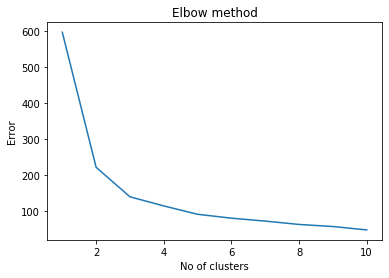

In [109]:
errors =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    errors.append(kmeans.inertia_)

plt.plot(range(1, 11), errors)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [111]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [112]:
%%time 
kmeans.fit(iris_df.iloc[:,:4])

CPU times: user 51.2 ms, sys: 307 µs, total: 51.5 ms
Wall time: 46.2 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [113]:
y_kMeans = kmeans.predict(iris_df.iloc[:,:4])

**True labels:**

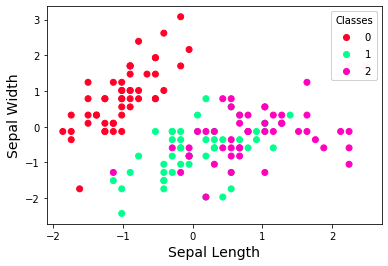

In [116]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.show()

**Predicted labels:**

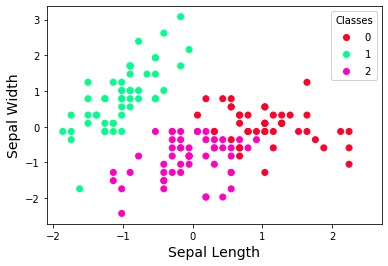

In [115]:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=y_kMeans, cmap='gist_rainbow')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.show()

## 7.2 MLlib Clustering

* MLLib KMeans Example: 
    * <https://spark.apache.org/docs/latest/ml-clustering.html>
    * <https://spark.apache.org/docs/latest/api/python/>
    * <https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.ClusteringEvaluator>
* Run KMeans on the provided Iris dataset!
* Validate the quality of the model using the sum of the squared error for each point! Use the ClusterEvaluator of Spark MLlib!

In [4]:
# Initialize PySpark
import os, sys
APP_NAME = "PySpark Lecture"
SPARK_MASTER="local[1]"
import pyspark
import pyspark.sql
from pyspark.sql import Row
conf=pyspark.SparkConf()
conf=pyspark.SparkConf().setAppName(APP_NAME).set("spark.local.dir", os.path.join(os.getcwd(), "tmp"))
sc = pyspark.SparkContext(master=SPARK_MASTER, conf=conf)
spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()

print("PySpark initiated...")

PySpark initiated...


#### Model Evaluation

* https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.ClusteringEvaluator

* Evaluator for Clustering results, which expects two input columns: prediction and features. The metric computes the Silhouette measure using the squared Euclidean distance.

## 7.3 Manual KMeans Clustering

Implement a KMeans Model using Spark MapReduce (Do Not use MLlib version!)!